In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import librosa
from IPython import display

2024-12-22 00:18:08.740398: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-22 00:18:08.748484: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-22 00:18:08.757349: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-22 00:18:08.760162: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-22 00:18:08.767197: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# Load the Speech Commands dataset
dataset, info = tfds.load('speech_commands', with_info=True, as_supervised=True)


2024-12-22 00:18:13.754071: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


/home/vistek/anaconda3/envs/deep_learning/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Dl Completed...: 0 url [00:00, ? url/s]
Generating train examples...:   0%|          | 0/85511 [00:00<?, ? examples/s]


ModuleNotFoundError: No module named 'pydub'
Failed importing pydub. This likely means that the dataset requires additional dependencies that have to be manually installed (usually with `pip install pydub`). See setup.py extras_require.

In [3]:
train_data, test_data = dataset['train'], dataset['test']


In [4]:
train_data.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int16, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [5]:
for spectrogram, label in train_data.take(1):
    print("Spectrogram shape:", spectrogram.shape)
    print("Label:", label)


Spectrogram shape: (16000,)
Label: tf.Tensor(4, shape=(), dtype=int64)


2024-12-17 00:41:55.137133: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2024-12-17 00:41:55.203184: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


7


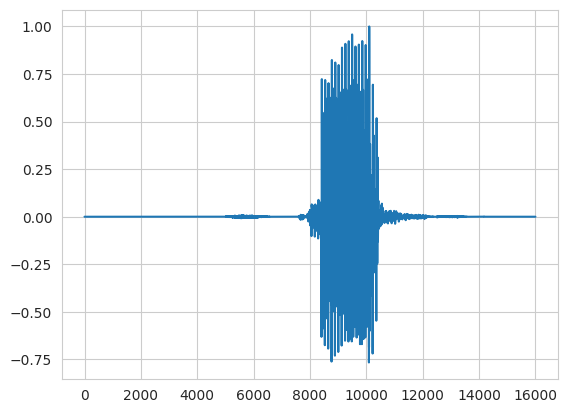

In [22]:
def compute_spectrogram(audio, frame_length=1024, frame_step=512):
    # Compute the STFT (Short-Time Fourier Transform)
    stft = tf.signal.stft(audio, frame_length=frame_length, frame_step=frame_step, pad_end=False)
    
    # Compute the magnitude of the STFT (abs value)
    spectrogram = tf.abs(stft)
    return spectrogram


# Plot the first spectrogram from the dataset
iterator = iter(train_data.take(3))
spectrogram, label = next(iterator)
spectrogram, label = next(iterator)
spectrogram, label = next(iterator)

print(label.numpy())
audio = spectrogram / tf.reduce_max(tf.abs(spectrogram))
audio = audio.numpy()
#plt.plot(audio)
    
    #spect = compute_spectrogram(spect, frame_length=512, frame_step=256)
    #plot_spectrogram(spect)  # Plot the first example
plt.plot(audio)


In [18]:
len(audio) / 16000

1.0

In [23]:
display.Audio(audio, rate=16000)

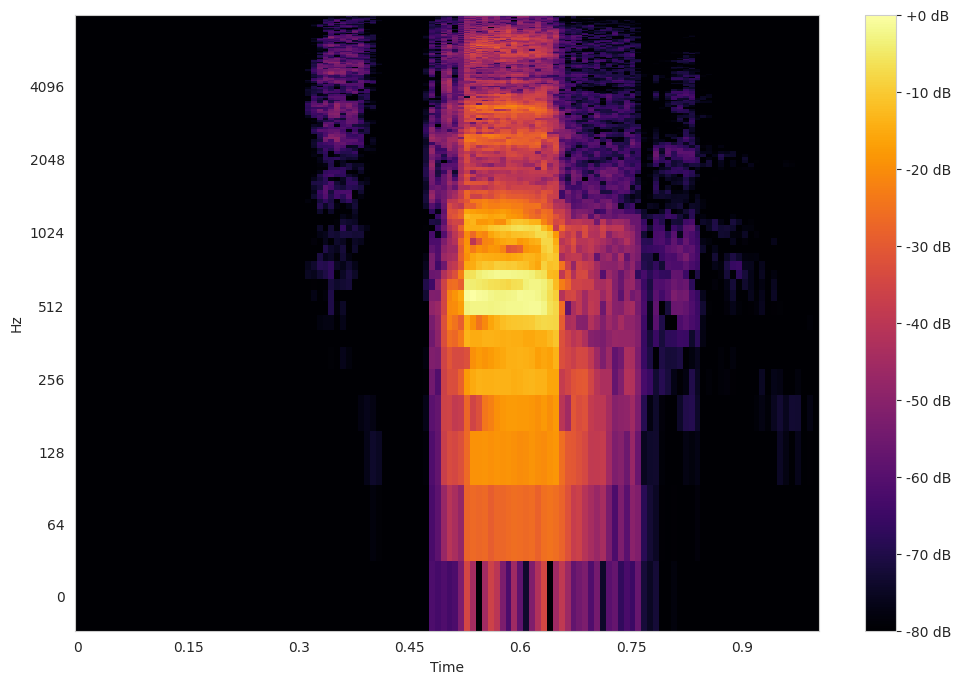

In [25]:
D = librosa.stft(audio, n_fft=256, hop_length=128, window='hann')

# Convert the complex-valued STFT to a magnitude spectrogram
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# Plot the spectrogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(S_db, x_axis='time', y_axis='log', sr=16000, cmap='inferno', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.show()